In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df=pd.read_csv('Rice.csv')
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [3]:
df.shape

(3810, 8)

In [4]:
# Display categories of class and target

df.Class.unique()

array(['Cammeo', 'Osmancik'], dtype=object)

In [5]:
# Get the total values of the different class

df.Class.value_counts()

,count
Class,
Osmancik,2180
Cammeo,1630


In [6]:
# Perform Data Preprocessing

df.Class=df.Class.apply(lambda x:1 if x=='Cammeo' else 2)
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,1
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,1
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,1
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,1
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,1


In [7]:
# Separate Features and Classes

X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [8]:
# Split Data into Training and Test Dataset

X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=1)

In [9]:
# Display the size of Training and Test Dataset

len(X_train),len(X_test),len(Y_train),len(Y_test)

(3048, 762, 3048, 762)

In [10]:
# Apply Logistic Regression to train the Model

lr=LogisticRegression(max_iter=400,random_state=1)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=400, random_state=1)

In [11]:
# Display the training and Test Accuracy of the Model

print('Accuracy on the train set: ',round(lr.score(X_train,Y_train),4))
print('Accuracy on the test set: ',round(lr.score(X_test,Y_test),4))

Accuracy on the train set:  0.9304
Accuracy on the test set:  0.9291


In [12]:
# Plot Confusion Matrix

Y_pred=lr.predict(X_test)
cm=metrics.confusion_matrix(Y_test,Y_pred)
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=lr.classes_)

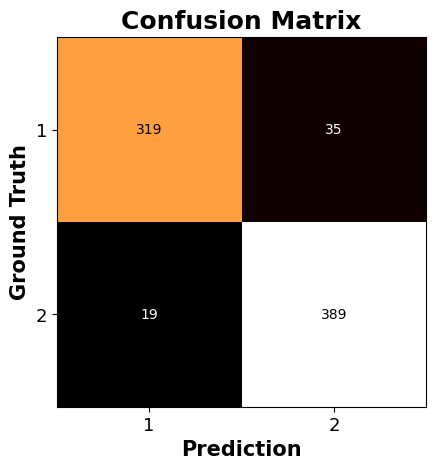

In [13]:
disp.plot(cmap='gist_heat',colorbar=False)
plt.xlabel('Prediction',fontsize=15,fontweight='bold')
plt.ylabel('Ground Truth',fontsize=15,fontweight='bold')
plt.title('Confusion Matrix',fontsize=18,fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [14]:
cat_labels=['Cammeo', 'Osmansik']
Y_pred = lr.predict(X_test)
cm=metrics.confusion_matrix(Y_test,Y_pred)
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=cat_labels)

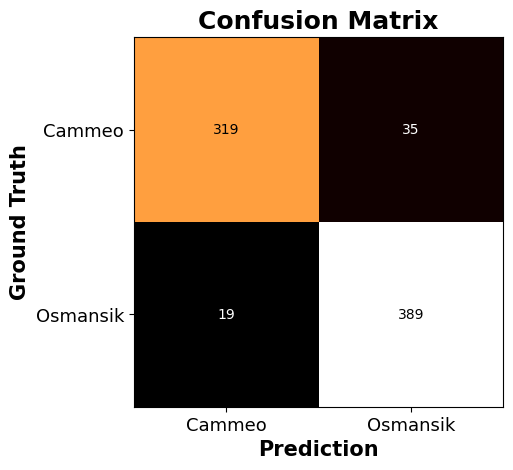

In [15]:
disp.plot(cmap='gist_heat',colorbar=False)
plt.xlabel('Prediction',fontsize=15,fontweight='bold')
plt.ylabel('Ground Truth',fontsize=15,fontweight='bold')
plt.title('Confusion Matrix',fontsize=18,fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [16]:
Y_test.value_counts()

,count
Class,
2,408
1,354


In [17]:
# Print Classification Report

print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.94      0.90      0.92       354
           2       0.92      0.95      0.94       408

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



In [18]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934,1.572178
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239,0.494828
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,1.000000
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862,1.000000
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361,2.000000
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562,2.000000
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050,2.000000


In [19]:
random_data=[[9000,400.3456789,200.64563746,80.856456737,0.897584,12000,0.674563]]
random_data=pd.DataFrame(random_data,columns=X.columns)
lr.predict(random_data)

array([1])